## Playoff Performers Project Part 2 - EDA

### Imports

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', None)

In [77]:
combined = pd.read_csv("C:/Users/kevin/Downloads/combined 2019-2023 v2.csv")
best_players = pd.read_csv("C:/Users/kevin/Downloads/best players combined 2019-2023 v2.csv")

In [53]:
combined['Pos_x'] = combined['Pos_x'].str.split('-').str[0]
best_players['Pos_x'] = best_players['Pos_x'].str.split('-').str[0]

In [3]:
combined.columns

Index(['Player', 'Pos_x', 'Age_x', 'Tm_x', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Year',
       'SeasonType_x', 'MPG', 'G_p', 'MP_p', 'PER_p', 'TS%_p', '3PAr_p',
       'FTr_p', 'ORB%_p', 'DRB%_p', 'TRB%_p', 'AST%_p', 'STL%_p', 'BLK%_p',
       'TOV%_p', 'USG%_p', 'OWS_p', 'DWS_p', 'WS_p', 'WS/48_p', 'OBPM_p',
       'DBPM_p', 'BPM_p', 'VORP_p', 'SeasonType_y', 'MPG_p', 'PER_diff',
       'VORP_diff', 'WS/48_diff'],
      dtype='object')

The column I will be focusing results on are WS/48_diff.

In [6]:
combined['Year'].unique()

array([2019, 2021, 2022, 2023, 2020], dtype=int64)

### Exploratory Data Analysis

Wrote a function that gives me the 15 top performers in terms of regular season to playoff WS/48 for every year.

In [5]:
def yearly_outperformers(df, group, all_in_metric):
    # Grouping the DataFrame by 'Year'
    groups = df.groupby(group)

    # Sorting the groups based on 'WS/48_diff' column and retrieving the top 15 results
    top_results = groups.apply(lambda x: x.sort_values(all_in_metric, ascending=False).head(15))

    # Resetting the index of the DataFrame
    top_results = top_results.reset_index(drop=True)

    return top_results[['Year', 'Player', all_in_metric, 'Age_x', 'Tm_x', 'G', 'MP']]

In [6]:
yearly_outperformers(combined, 'Year', 'WS/48_diff')

,Year,Player,WS/48_diff,Age_x,Tm_x,G,MP
0,2019,George Hill,0.128,32,MIL,60,1302
1,2019,Marcus Morris,0.102,29,BOS,75,2091
2,2019,P.J. Tucker,0.081,33,HOU,82,2802
3,2019,Cory Joseph,0.068,27,IND,82,2063
4,2019,Caris LeVert,0.061,24,BRK,40,1063
5,2019,Rodney Hood,0.052,26,POR,72,1893
6,2019,Jaylen Brown,0.046,22,BOS,74,1913
7,2019,Austin Rivers,0.044,26,HOU,76,2028
8,2019,Nikola Jokić,0.037,23,DEN,80,2504
9,2019,DeMar DeRozan,0.037,29,SAS,77,2688


In [7]:
yearly_outperformers(best_players, 'Year', 'WS/48_diff')

,Year,Player,WS/48_diff,Age_x,Tm_x,G,MP
0,2019,P.J. Tucker,0.081,33,HOU,82,2802
1,2019,Jaylen Brown,0.046,22,BOS,74,1913
2,2019,Nikola Jokić,0.037,23,DEN,80,2504
3,2019,DeMar DeRozan,0.037,29,SAS,77,2688
4,2019,Marc Gasol,0.033,34,TOR,79,2436
5,2019,Kawhi Leonard,0.025,27,TOR,60,2040
6,2019,Gary Harris,0.024,24,DEN,57,1639
7,2019,Jimmy Butler,0.022,29,PHI,65,2185
8,2019,Dennis Schröder,0.022,25,OKC,79,2314
9,2019,Jamal Murray,0.020,21,DEN,75,2447


These results pass the eye test, especially 2023, where guys like Anthony Edwards, Devin Booker, Jamal Murray, and Caleb Martin broke the top 15 in WS/48 differentials. What also stands out is when you decide to sort on 15 players, the best players list starts getting to negative differentials at the bottom of the list. As a reminder, the best players dataframe was filtered on playing at least 30 minutes a game in the playoffs. This goes to show it is hard to elevate your play in the playoffs.

In [8]:
combined_top15_year = yearly_outperformers(combined, 'Year', 'WS/48_diff')
best_top15_year = yearly_outperformers(best_players, 'Year', 'WS/48_diff')
combined_top15_year_PER = yearly_outperformers(combined, 'Year', 'PER_diff')
best_top15_year_PER = yearly_outperformers(best_players, 'Year', 'PER_diff')

In [9]:
print('Avg of top 15 win share differences across players that played at least 19 mpg in the playoffs: ' 
      , combined_top15_year['WS/48_diff'].mean())
print('Avg of top 15 win share differences across players that played at least 30 mpg in the playoffs: ' 
      , best_top15_year['WS/48_diff'].mean())
print('% better differential from combined to best players: ', 
      ((combined_top15_year['WS/48_diff'].mean()/best_top15_year['WS/48_diff'].mean())-1))

Avg of top 15 win share differences across players that played at least 19 mpg in the playoffs:  0.059466666666666654
Avg of top 15 win share differences across players that played at least 30 mpg in the playoffs:  0.033079999999999964
% better differential from combined to best players:  0.797662232970578


In [10]:
print('Avg of top 15 win share differences across players that played at least 19 mpg in the playoffs: ' 
      , combined_top15_year_PER['PER_diff'].mean())
print('Avg of top 15 win share differences across players that played at least 30 mpg in the playoffs: ' 
      , best_top15_year_PER['PER_diff'].mean())
print('% better differential from combined to best players: ', 
      ((combined_top15_year_PER['PER_diff'].mean()/best_top15_year_PER['PER_diff'].mean())-1))

Avg of top 15 win share differences across players that played at least 19 mpg in the playoffs:  4.897333333333333
Avg of top 15 win share differences across players that played at least 30 mpg in the playoffs:  3.116
% better differential from combined to best players:  0.5716730851519041


In [34]:
combined_top15_year.to_excel('C:/Users/kevin/Downloads/top yearly WS differentials - 19 mins.xlsx', index=False)
best_top15_year.to_excel('C:/Users/kevin/Downloads/top yearly WS differentials - 30 mins.xlsx', index=False)

Here are some tables put together in Tableau that show the win shares differentials of the best players dataframe: https://public.tableau.com/views/WinSharesDifferentialsbyYear/YearlyAverage?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [31]:
def consistent_players(df, group, all_in_metric, number, filter_num):
    groups = df.groupby(group)

    # Filtering out players with less than filter_num rows
    groups_filtered = groups.filter(lambda x: len(x) >= filter_num)

    # Calculating the average of 'WS/48_diff' for each player group
    average_ws48_diff = groups_filtered.groupby(group)[all_in_metric].mean()

    # Sorting the average values in descending order
    sorted_average = average_ws48_diff.sort_values(ascending=False).head(number)

    # Retrieve the top x number of results
    top_results = sorted_average.reset_index()

    # Selecting desired columns and renaming them
    desired_columns = [group, all_in_metric]
    result = top_results[desired_columns]

    # Merge with the original DataFrame to include 'Pos_x'
    result = result.groupby(group).first().reset_index().sort_values(all_in_metric, ascending=False)
    
    return result

The function above groups players across their multiple appearances in the playoffs to get an average WS/48 difference. This is to see who has performed well across multiple seasons. The threshold is appearing in at least 2 postseasons.

In [34]:
consistent_players(combined, 'Player', 'WS/48_diff', 10, 2)

,Player,WS/48_diff
0,Anthony Edwards,0.072000
8,Rui Hachimura,0.062500
2,Jamal Murray,0.050667
9,Serge Ibaka,0.047500
5,Pat Connaughton,0.044250
6,RJ Barrett,0.044000
4,P.J. Tucker,0.042400
7,Robert Covington,0.042000
3,Kawhi Leonard,0.024750
1,Blake Griffin,0.021000


In [35]:
consistent_players(best_players, 'Player', 'WS/48_diff', 10, 2)

,Player,WS/48_diff
0,Anthony Edwards,0.072000
5,Mike Conley,0.066500
9,Seth Curry,0.056500
3,Jamal Murray,0.050667
6,P.J. Tucker,0.044500
7,RJ Barrett,0.044000
8,Robert Covington,0.042000
4,Kawhi Leonard,0.024750
2,Eric Gordon,0.021000
1,Ben Simmons,0.017500


This top 10 is all perimeter players.

In [54]:
combined['Pos_x'].value_counts()

SG    120
PG    116
PF    104
SF    103
C      89
Name: Pos_x, dtype: int64

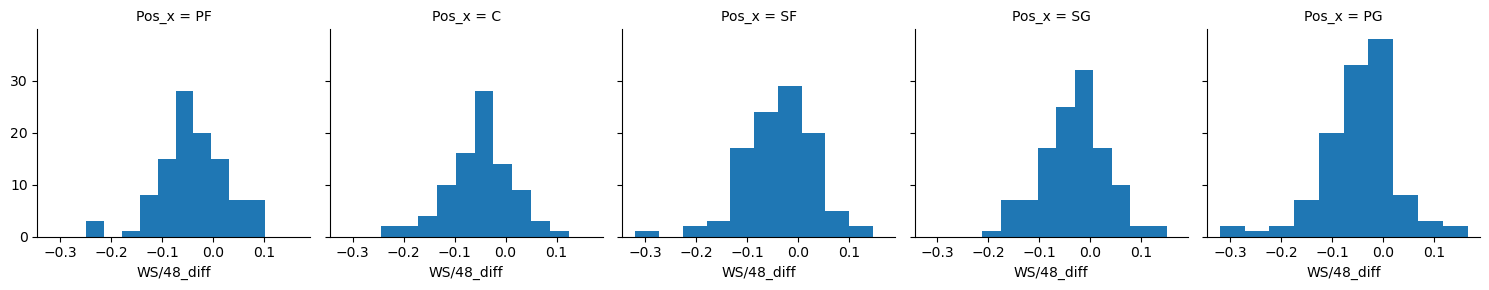

In [61]:
g = sns.FacetGrid(combined, col='Pos_x')
g.map(plt.hist, 'WS/48_diff')

In [63]:
combined.groupby('Pos_x')['WS/48_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos_x,,,,,,,,
C,89.0,-0.049584,0.063689,-0.245,-0.08300,-0.0450,-0.0100,0.124
PF,104.0,-0.039750,0.065586,-0.249,-0.07800,-0.0415,0.0055,0.102
PG,116.0,-0.044879,0.074735,-0.320,-0.08625,-0.0345,-0.0010,0.166
SF,103.0,-0.036796,0.069974,-0.319,-0.08100,-0.0300,0.0135,0.147
SG,120.0,-0.030325,0.063941,-0.212,-0.06925,-0.0250,0.0075,0.150


In [56]:
best_players['Pos_x'].value_counts()

PG    67
SF    64
SG    61
PF    56
C     48
Name: Pos_x, dtype: int64

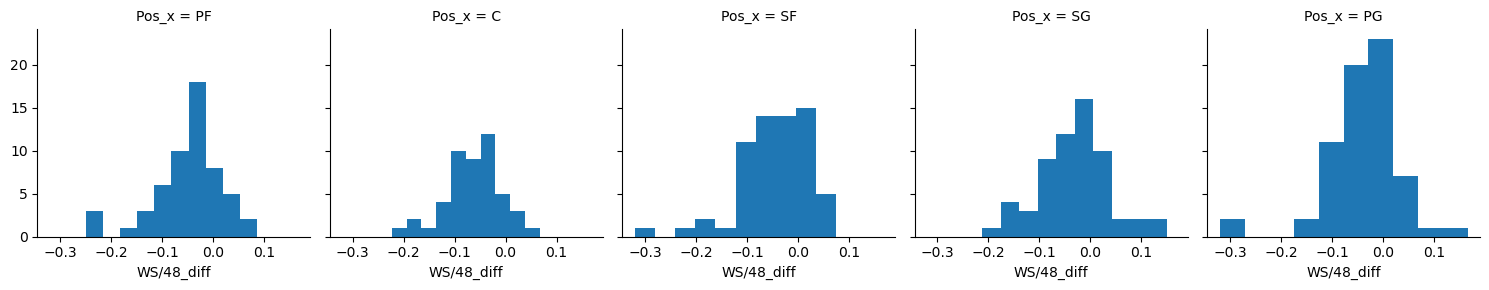

In [64]:
g = sns.FacetGrid(best_players, col='Pos_x')
g.map(plt.hist, 'WS/48_diff')

In [65]:
best_players.groupby('Pos_x')['WS/48_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos_x,,,,,,,,
C,48.0,-0.062542,0.058015,-0.223,-0.0955,-0.0575,-0.02700,0.067
PF,56.0,-0.047375,0.067966,-0.249,-0.0785,-0.0405,-0.00200,0.086
PG,67.0,-0.037313,0.073353,-0.320,-0.0720,-0.0320,0.00550,0.166
SF,64.0,-0.043547,0.068482,-0.319,-0.0825,-0.0400,0.00125,0.074
SG,61.0,-0.031934,0.068860,-0.212,-0.0770,-0.0240,0.00700,0.150


It looks like for both the full data look and the best players look, the perimeter players (PG-SF) have the best differentials from regular season to playoffs. They also have the largest standard deviation. This signals to me that perimeter players control more of the game and have a larger opportunity to shrink or elevate their game since the ball is in their hands more.

In [86]:
grouped_data = best_players.groupby('Pos_x')['WS/48_diff']

# Create a list to store the data for each group
groups = []

# Append the data for each group to the list
for _, group_data in grouped_data:
    groups.append(group_data)

# Perform one-way ANOVA test
statistic, p_value = stats.f_oneway(*groups)

# Print the results
print("ANOVA Test Results:")
print("Statistic:", statistic)
print("p-value:", p_value)

ANOVA Test Results:
Statistic: 1.56414457120025
p-value: 0.18390263646815233


The p-value is relatively low, although not quite statistically signifiant if you use the traditional alpha of 0.05. There is an assumption of equal variance among groups that I previously called out may not be met. However, those differences are small and likely not statistically significant, so the ANOVA test still makes sense. A lower p-value here signifies a higher likelihood that at least one pair of positions has a different WS/48_diff mean. In the output below, a statistically significant p-value is demonstrated between the C vs. SG positions and the C vs. PG positions. This supports my argument that perimeter players have more change from reg season to postseason in overall output.

In [87]:
# Group the data by 'Pos_x' and extract the 'WS/48_diff' column
grouped_data = best_players.groupby('Pos_x')['WS/48_diff']

# Create a list of unique positions
positions = best_players['Pos_x'].unique()

# Perform pairwise t-tests for each combination of positions
for i in range(len(positions)):
    for j in range(i+1, len(positions)):
        pos1 = positions[i]
        pos2 = positions[j]
        
        group1 = grouped_data.get_group(pos1)
        group2 = grouped_data.get_group(pos2)
        
        # Perform independent t-test
        statistic, p_value = stats.ttest_ind(group1, group2)
        
        # Print the results
        print(f"T-Test Results for {pos1} vs {pos2}:")
        print("Statistic:", statistic)
        print("p-value:", p_value)
        print()

T-Test Results for PF vs C:
Statistic: 1.2128388380470743
p-value: 0.2279929073397874

T-Test Results for PF vs SF:
Statistic: -0.3065674065460956
p-value: 0.7597129556896691

T-Test Results for PF vs SG:
Statistic: -1.219147132839918
p-value: 0.22528310629510373

T-Test Results for PF vs PG:
Statistic: -0.7831801433500201
p-value: 0.4350515519730732

T-Test Results for C vs SF:
Statistic: -1.5490704298779046
p-value: 0.12423714894882407

T-Test Results for C vs SG:
Statistic: -2.466236612595257
p-value: 0.015241950524584002

T-Test Results for C vs PG:
Statistic: -1.9794490109401184
p-value: 0.050197162644964155

T-Test Results for SF vs SG:
Statistic: -0.9450943101728968
p-value: 0.34646358046928816

T-Test Results for SF vs PG:
Statistic: -0.5021854011551381
p-value: 0.6163932356290931

T-Test Results for SG vs PG:
Statistic: 0.42660071297464286
p-value: 0.6703981609264982



In [67]:
best_players.groupby('Pos_x')['USG%_p'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos_x,,,,,,,,
C,48.0,21.141667,7.206050,10.2,15.00,19.40,25.30,36.8
PF,56.0,20.846429,7.610255,9.6,14.15,19.65,26.00,38.5
PG,67.0,25.898507,6.200794,12.7,21.70,26.00,29.95,40.4
SF,64.0,21.734375,6.570188,8.9,16.50,21.85,28.00,33.3
SG,61.0,22.977049,5.830363,12.1,18.50,22.10,27.60,37.5


Those are the positions that correlate to the highest usage percentage as well, which supports my theory.

In [69]:
best_players['abs_WS_diff'] = best_players['WS/48_diff'].abs()

In [75]:
best_players.corr()['abs_WS_diff'].sort_values(ascending=False).head(10)

C:\Users\kevin\AppData\Local\Temp\ipykernel_15308\2826567736.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  best_players.corr()['abs_WS_diff'].sort_values(ascending=False).head(10)


abs_WS_diff    1.000000
TOV%_p         0.264001
PER            0.233218
OBPM           0.224496
USG%           0.208533
OWS            0.197774
BPM            0.185439
WS/48          0.181356
VORP           0.181245
USG%_p         0.180356
Name: abs_WS_diff, dtype: float64

As you can see, usage % has a heavy correlation to how much your win shares changes from regular season to postseason. The rest of these metrics that comprise the top 10 in terms of correlation to the absolute value of the win shares change are other catch all efficiency metrics.

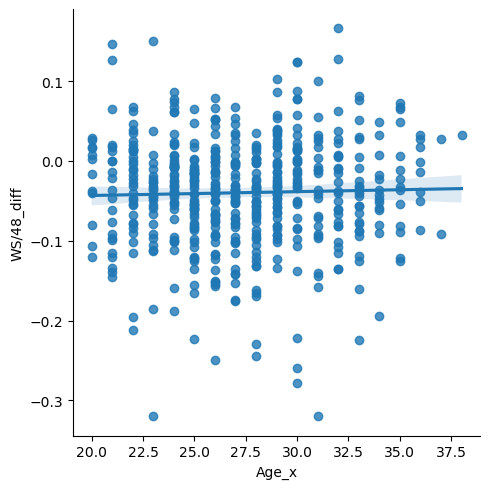

In [82]:
sns.lmplot(x='Age_x', y='WS/48_diff', data=combined)

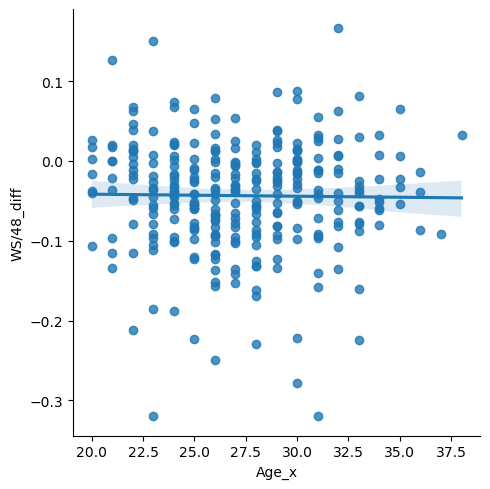

In [83]:
sns.lmplot(x='Age_x', y='WS/48_diff', data=best_players)

There seems to be almost no trend line between age and the WS/48 difference from regular season to postseason. However, the trend on the combined dataframe is slightly more positive. This suggests players level up their play more in the postseason as they get older. This can be a result of more experience as well as probably resting more in the regular season. For the best in the game though, age is not a big factor.

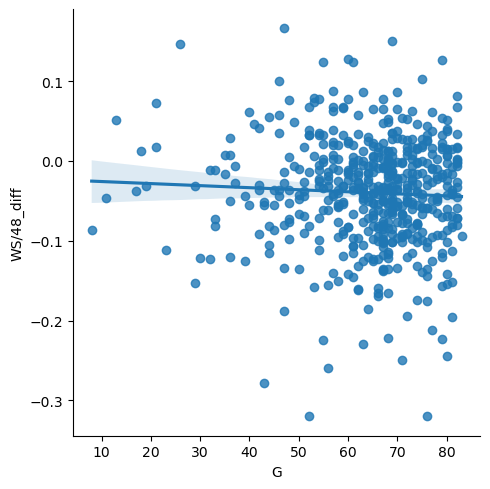

In [84]:
sns.lmplot(x='G', y='WS/48_diff', data=combined)

The point about resting more seems to have some merit here. The trend line shows that when playing more games, the trend is to have a worse WS/48 differential from regular season to postseason.